In [41]:
import os
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', 100)

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9, 4

In [2]:
def FetAverageResults(label, path):
    currentDir = os.getcwd();
    avg_result = None
    try:
        os.chdir(path)
        global_df = []
        for root, dirs, files in os.walk("."):
            if (root.endswith("Results")):
                for file in files:
                    if (file.startswith("Global.txt")):
                        global_df.append(pd.read_csv(root + "/" + file))
        avg_result = pd.concat(global_df, ignore_index=True)
        avg_result = avg_result.groupby('Year').mean()
    except OSError as err:
        print(os.getcwd(),'\n', err)
    else:
        os.chdir(currentDir)
        avg.append(avg_result)
        labels.append(label)
        experiments.append(path)        
        print('Sucess:', label, '\trows:', len(avg_result))
    finally:
        os.chdir(currentDir)


In [3]:
def RemoveConstantCols():
    for i in range(len(avg)):
        df = avg[i]
        cnt = 0;
        names = ''
        for column in df.columns:
            if (df[column][df.index[-1]] == df[column][df.index[1]]):
                names += column + ': ' + str(df[column][df.index[-1]]) + ';'
                cnt += 1
                del df[column]
        print(labels[i] + " removed cols:", cnt, '\n', names, '\n')

In [30]:
labels = []
experiments = []
avg = []
FetAverageResults('001.Initial', 'Logs\\MemesGettingCheapest\\001.InitialState.40UTH.trsim'),
FetAverageResults('10000000years.avg', 'Logs\\MemesGettingCheapest\\001.InitialState.40UTH.10000000years.trsim'),
FetAverageResults('10000000.01', 'Logs\\MemesGettingCheapest\\001.InitialState.40UTH.10000000years.trsim\\20211227_102903'),
FetAverageResults('10000000.02', 'Logs\\MemesGettingCheapest\\001.InitialState.40UTH.10000000years.trsim\\20211227_140047'),
FetAverageResults('10000000.03', 'Logs\\MemesGettingCheapest\\001.InitialState.40UTH.10000000years.trsim\\20211227_172947')

Sucess: 001.Initial 	rows: 301
Sucess: 10000000years.avg 	rows: 10001
Sucess: 10000000.01 	rows: 10001
Sucess: 10000000.02 	rows: 10001
Sucess: 10000000.03 	rows: 10001


In [31]:
RemoveConstantCols()

001.Initial removed cols: 39 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value (F.r. determintaion efficiency): 0.0; Avg. phenotype value (F.r. punishment likely

In [32]:
avg

[         Average memes known   Average resources posessed  \
 Year                                                        
 0                     0.0000                      20.0000   
 1000                  3.2846                      17.3362   
 2000                  7.3096                      17.6650   
 3000                 12.1470                      17.8068   
 4000                 14.3734                      17.8722   
 ...                      ...                          ...   
 296000               23.4478                      17.6130   
 297000               23.3992                      17.5942   
 298000               23.3196                      17.2688   
 299000               23.3810                      17.2872   
 300000               23.5718                      17.4106   
 
          Avg. genotype value (Memory limit)  \
 Year                                          
 0                                    0.0000   
 1000                                 0.7866   


In [140]:
#os.chdir('..')
os.getcwd()

'D:\\Projects\\Tribes\\TribeSim\\LogsProcessing'

In [38]:
memoryFeature = ["Memory limit", "MemoryLimit", "ML"]
memoryAvg = ' Avg. phenotype value ({})'.format(memoryFeature[0])
features = [
    ["Trick likelyhood","Trick efficiency", "Teaching likelyhood", "Teaching efficiency", "Study likelyhood", "Study efficiency", "F.r. punishment likelyhood", "F.r. determintaion efficiency", "Going hunting likelyhood", "Hunting efficiency", "Hunting B efficiency", "Cooperation efficiency", "Creativity", "Useless actions likelihood", "Ageing rate", "Creativity"],
    ['TrickLikelyhood','TrickEfficiency','TeachingLikelyhood','TeachingEfficiency','StudyLikelyhood','StudyEfficiency','FreeRiderPunishmentLikelyhood','FreeRiderDeterminationEfficiency','LikelyhoodOfNotBeingAFreeRider','HuntingEfficiency','HuntingBEfficiency','CooperationEfficiency','Creativity','UselessActionsLikelihood','AgeingRate','Creativity'],
    ["TrL","TrE","TeL","TeE","SL","SE","FRPL","FRDE","HL","HE","HBE","CE","Cre","Usl","AR","Cre"]]
def MemesEfficiency(index):
    return ' {} memes efficiency'.format(features[2][index])
def AvgPhenotype(index):
    return ' Avg. phenotype value ({})'.format(features[0][index])
def AvgMemesSize():
    for i in range(len(avg)):
        df = avg[i]
        for feature in range(len(features[0])):
            memoryPercent = ' % memory: {}'.format(features[1][feature])
            if ((AvgPhenotype(feature) in df.columns) & (memoryPercent in df.columns)):
                df[MemesEfficiency(feature)] = avg[i][AvgPhenotype(feature)]/(avg[i][memoryAvg]*avg[i][memoryPercent])
                print (MemesEfficiency(feature),experiments[i])
        df[' Meme size'] = df[' Avg. phenotype value (Memory limit)']*(1-df[' % memory: unused'])/df[' Average memes known']
AvgMemesSize()

 TrE memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.trsim
 HE memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.trsim
 Usl memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.trsim
 TrE memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.10000000years.trsim
 HE memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.10000000years.trsim
 Usl memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.10000000years.trsim
 TrE memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.10000000years.trsim\20211227_102903
 HE memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.10000000years.trsim\20211227_102903
 Usl memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.10000000years.trsim\20211227_102903
 TrE memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.10000000years.trsim\20211227_140047
 HE memes efficiency Logs\MemesGettingCheapest\001.InitialState.40UTH.1

In [23]:
pd.DataFrame([avg_df.iloc[avg_df.shape[0]-1] for avg_df in avg])

,Average memes known,Average resources posessed,Avg. genotype value (Memory limit),Avg. phenotype value (Hunting efficiency),Avg. phenotype value (Memory limit),Avg. phenotype value (Trick efficiency),Avg. phenotype value (Useless actions likelihood),Live memes,Population,Tribes in the world.,% memory: HuntingEfficiency,% memory: TrickEfficiency,% memory: unused,% memory: UselessActionsLikelihood,Average hunting efforts,Child births,Deaths of old age,Meme Invented,Percentage of hunters,Total hunting efforts,Child average brain size,Deaths of hunger,% memory: unused when died,Longevity,TrE memes efficiency,HE memes efficiency,Usl memes efficiency,Meme size
300000,23.571800,17.4106,4.832400,126.931600,4.832400,11.032200,0.004756,111.200000,447.600000,22.600000,0.3162,0.197800,0.4824,0.003376,2231.492000,18.6,17.0,0.0,0.890800,50380.900000,24.8194,1.800000,0.283200,26.902000,11.541785,83.070154,0.291525,0.106112
10000000,23.419333,16.8070,3.751667,159.083333,3.751667,9.908333,0.001290,107.333333,456.666667,20.666667,0.3140,0.228333,0.4560,0.001670,2971.187333,15.0,19.0,NaN,0.855667,62225.166667,23.7270,1.333333,0.258667,24.479667,11.566635,135.042600,0.205897,0.087146
10000000,22.969000,17.6410,3.637000,177.202000,3.637000,8.776000,0.000000,109.000000,450.000000,23.000000,0.3230,0.230000,0.4470,0.000000,2854.229000,10.0,19.0,NaN,0.847000,68501.500000,23.5190,1.000000,0.268000,26.000000,10.491208,150.842178,NaN,0.087564
10000000,23.722000,15.9770,3.056000,157.767000,3.056000,10.351000,0.001380,104.000000,474.000000,20.000000,0.3310,0.197000,0.4690,0.003040,3046.675000,20.0,15.0,NaN,0.845000,60933.500000,23.1620,3.000000,0.319000,21.222000,17.193438,155.967756,0.148543,0.068406
10000000,23.567000,16.8030,4.562000,142.281000,4.562000,10.598000,0.002490,109.000000,446.000000,19.000000,0.2880,0.258000,0.4520,0.001970,3012.658000,15.0,23.0,NaN,0.875000,57240.500000,24.5000,0.000000,0.189000,26.217000,9.004279,108.292690,0.277063,0.106080


In [9]:
def ShowGraph(dataframe, column, label):
    if (column in dataframe.columns):
        plt.plot(dataframe[column], label=label)
        plt.legend()
#ShowGraph(avg[0], ' Avg. phenotype value (Memory limit)', '{} Memory limit'.format(labels[i]))
#ShowGraph(avg[0], ' TrE memes efficiency', '{} TrE memes efficiency'.format(labels[i]))
#plt.show()

# 001.InitialState.40UTH.trsim

Сначала воспроизведем симуляцию из оригинальной статьи и полюбуемся на культурный драйв и измельчание мемов. 

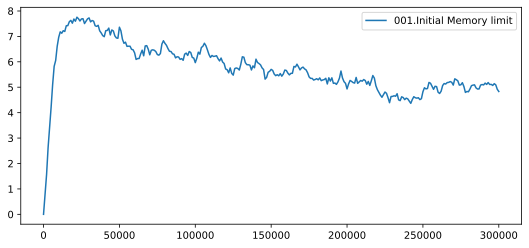

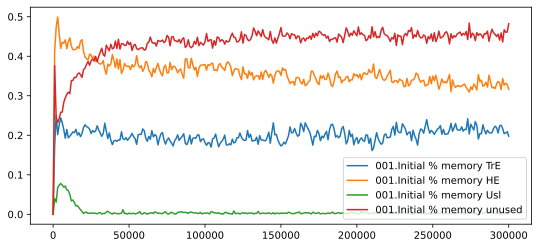

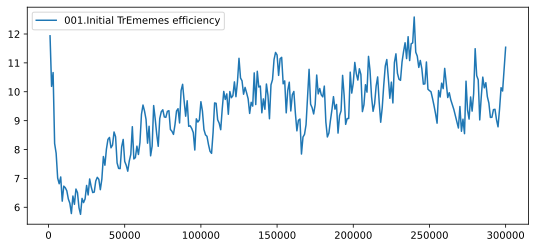

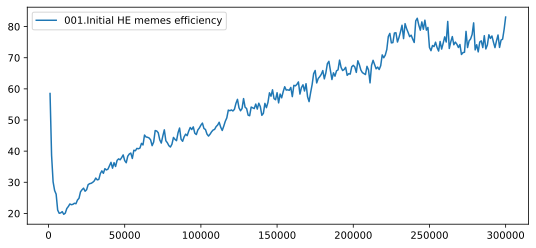

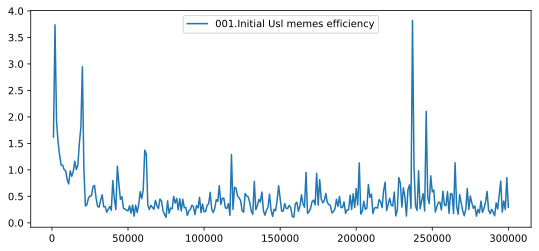

In [42]:
ShowGraph(avg[0], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[0]))
plt.show()

ShowGraph(avg[0], ' % memory: TrickEfficiency', label='{} % memory TrE'.format(labels[0]))
ShowGraph(avg[0], ' % memory: HuntingEfficiency', label='{} % memory HE'.format(labels[0]))
ShowGraph(avg[0], ' % memory: UselessActionsLikelihood', label='{} % memory Usl'.format(labels[0]))
ShowGraph(avg[0], ' % memory: unused', label='{} % memory unused'.format(labels[0]))
plt.show()

ShowGraph(avg[0], ' TrE memes efficiency', label='{} TrEmemes efficiency'.format(labels[0]))
plt.show()

ShowGraph(avg[0], ' HE memes efficiency', label='{} HE memes efficiency'.format(labels[0]))
plt.show()

ShowGraph(avg[0], ' Usl memes efficiency', label='{} Usl memes efficiency'.format(labels[0]))
plt.show()


Итак, что мы видим на графиках.<BR>
1) Эффект деградации памяти, связанный с измельчанимем мемов действительно есть. Рванув сначала к вершинам позже память съёжилась почти вдвое.<BR>
2) В небольших сообществах групповой отбор может успешно сдерживать разрастание всякой неполезной фигни. Мемы TrE не занимают в мозгах больше 20%, а безусловно бесполезные Usl вообще загнаны в область сотых процентов. Надо учитывать, что группвой отбор идёт жестоко и интенсивно, ни одно племя не протянуло больше 30.000 лет<BR>
3) Начиная с некотрого момент начинает рости объём не используемой памяти, что, собственно и ведёт к её съёживанию. Более подроб ный анализ мемов, эживущих в мозгах у нашей популяции проведём дальше.<BR>
4) На следующих трёх графиках средня эффективность мемов - Приносимый результат делёный на место занимаемое в памяти. Хорошо видно, как первоначально в маленький неокрепший мозг прокрадываются самые лучшие из мемов. Дальше как только размер памяти выростает её стремятся занять самые разные мемы включая и довольно неэффективные, лишь бы набрать суммарный результат, после чего на первое место выходит отбор на эффективность мемов, и она выростает в 2-4 раза. Бесполезные мемы не эволюционируют никак, оно и понятно.<BR><BR>
Для самоконтроля запустим симуляцию на 10 миллионов лет, чтобы убедиться, что процессы будут проходить те же самые и без качественных отличий. После первых 300.000 лет ничего значимого уже ничего не происходит, размер памяти меньше 50% от максимума уже не снижается. Три прогона всю ночь считались.

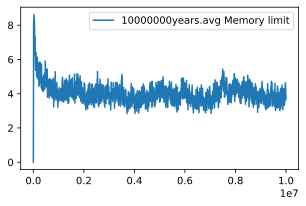

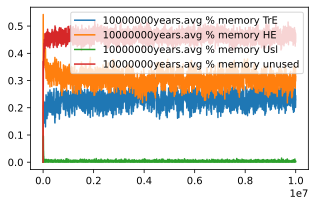

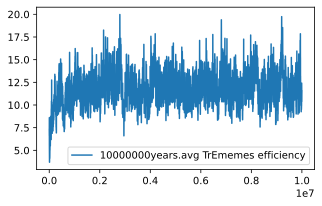

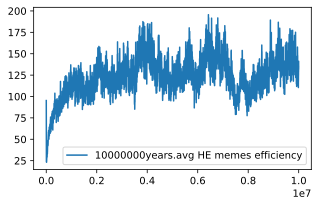

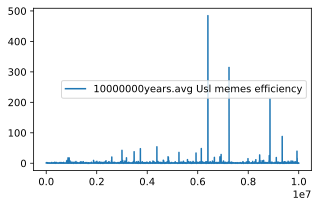

In [47]:
figureFigsize = rcParams['figure.figsize']
rcParams['figure.figsize'] = 5, 3
ShowGraph(avg[1], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[1]))
plt.show()

ShowGraph(avg[1], ' % memory: TrickEfficiency', label='{} % memory TrE'.format(labels[1]))
ShowGraph(avg[1], ' % memory: HuntingEfficiency', label='{} % memory HE'.format(labels[1]))
ShowGraph(avg[1], ' % memory: UselessActionsLikelihood', label='{} % memory Usl'.format(labels[1]))
ShowGraph(avg[1], ' % memory: unused', label='{} % memory unused'.format(labels[1]))
plt.show()

ShowGraph(avg[1], ' TrE memes efficiency', label='{} TrEmemes efficiency'.format(labels[1]))
plt.show()

ShowGraph(avg[1], ' HE memes efficiency', label='{} HE memes efficiency'.format(labels[1]))
plt.show()

ShowGraph(avg[1], ' Usl memes efficiency', label='{} Usl memes efficiency'.format(labels[1]))
plt.show()
rcParams['figure.figsize'] = figureFigsize

Давайте более внимательно посмотрим на первые 100 тысяч лет. эволюции памяти

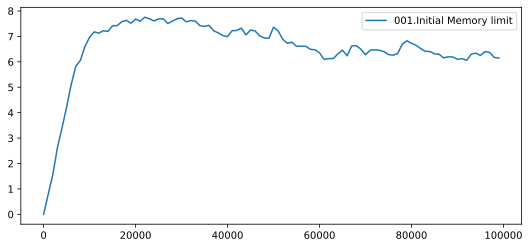

In [48]:
ShowGraph(avg[0][:100], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[0]))
plt.show()

Явно видно, что скукоживание мозга идёт медленно. Существенно медленнее, чем предшествующий его рост. А в наших реальных данных в случае человека процесс идёт как минимум быстрее чем мозг увеличивался. ВОзможно это связано с тем, что работает много ещё других факторов. А может быть это связано с тем, что сейчас мы смотрим на сильно упрощённую модель, в которой мемы не взаимодействуют друг с другом и не дают куммулятивного эффекта, креатьивность никак не зависит от имеющихся мемов, размер предельной кормовой базы не зависит от мемов и т.п. что может соответствовать простейшим существам, но явно слишком упрощено по сравнению с человеческой культурой. Для интереса я поэкспериментировал сделав креативность мутирующей чертой. Выяснилось, что эволюция не готова за креативность доплачивать, по крайней мере при такой низкой вероятности и бесплатном обучении. Достаточно и того, чтобы она была не нулевой.